In [42]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
client= pymongo.MongoClient('mongodb://127.0.0.1:27017/')

In [14]:
client.list_database_names()

['Employee', 'admin', 'config', 'electronics', 'local', 'yadav']

In [17]:
db = client.electronics

In [18]:
db.list_collection_names()

['dataset']

In [19]:
table=db.dataset
table.count_documents({}) 

7824481

In [20]:
table.find_one()

{'_id': ObjectId('605da7c74b789df8005d20b5'),
 'userID': 'A2CX7LUOHB2NDG',
 'productID': 321732944,
 'ratings': 5.0,
 'timestamp': 1341100800}

In [21]:
first_instance=table.find_one() 

In [22]:
first_instance.keys()

dict_keys(['_id', 'userID', 'productID', 'ratings', 'timestamp'])

In [23]:
import pandas as pd
samples=table.find().sort("_id",pymongo.DESCENDING)[:]
df=pd.DataFrame(samples)

df.head()

,_id,userID,productID,ratings,timestamp
0,605da8354b789df800d48515,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200
1,605da8354b789df800d48514,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
2,605da8354b789df800d48513,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
3,605da8354b789df800d48512,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
4,605da8354b789df800d48511,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600


In [25]:
recomm_df=df

In [29]:
df.drop(['_id'], axis = 1)

,userID,productID,ratings,timestamp
0,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200
1,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
2,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
3,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
4,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
...,...,...,...,...
7824476,A1QGNMC6O1VW39,511189877,5.0,1397433600
7824477,A1GI0U4ZRJA8WN,439886341,1.0,1334707200
7824478,A2WNBOD3WNDNKT,439886341,3.0,1374451200
7824479,A2NWSAGRHCP8N5,439886341,1.0,1367193600


In [30]:
recomm_df=df

In [31]:
recomm_df.shape

(7824481, 5)

In [32]:
recomm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824481.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824481.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [ ]:
recomm_df = recomm_df.drop(['timestamp'], axis=1)

In [34]:
recomm_df.isna().sum()

_id          0
userID       0
productID    0
ratings      0
dtype: int64

In [37]:
recomm_df.shape

(7824481, 4)

In [39]:
recomm_df = recomm_df.drop(['_id'], axis=1)

In [40]:
recomm_df.shape

(7824481, 3)

array([[<AxesSubplot:title={'center':'ratings'}>]], dtype=object)

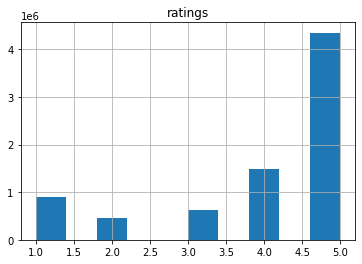

In [41]:
recomm_df.hist('ratings',bins = 10)

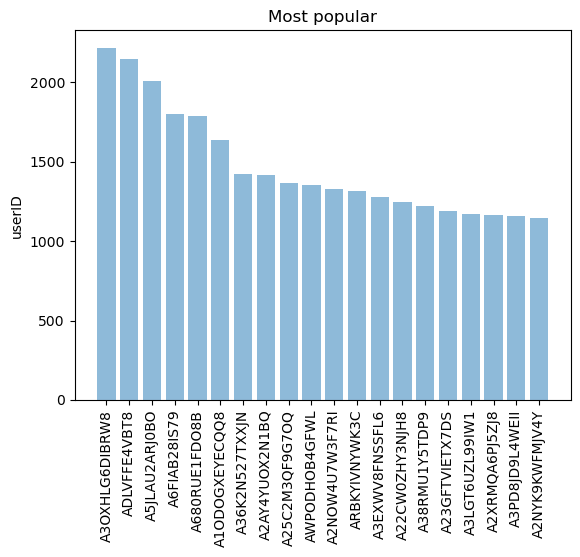

In [43]:
popular = recomm_df[['userID','ratings']].groupby('userID').sum().reset_index()
popular_20 = popular.sort_values('ratings', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_20['userID']))
y_pos = np.arange(len(objects))
performance = list(popular_20['ratings'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('userID')
plt.title('Most popular')
 
plt.show()

In [44]:
# find unique users
recomm_df.userID.value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A4OS1218KOIPF       1
A38C6GWIIGR2DZ      1
A3SCXPO1R9WE4E      1
A2XD8MMBXPX5X2      1
A2D7IXO1XZV76G      1
Name: userID, Length: 4201696, dtype: int64

In [45]:
print('Number of unique users', len(recomm_df['userID'].unique()))

Number of unique users 4201696


In [46]:
print('Number of unique products', len(recomm_df['productID'].unique()))

Number of unique products 476001


In [47]:
print('Unique Ratings', recomm_df['ratings'].unique())

Unique Ratings [5. 4. 3. 1. 2.]


In [48]:
min_ratings1 = recomm_df[(recomm_df['ratings'] < 2.0)]

In [49]:
print('Number of unique products rated low',len(min_ratings1['productID'].unique()))

Number of unique products rated low 176283


In [50]:
med_ratings1 = recomm_df[(recomm_df['ratings'] > 2.0) & (recomm_df['ratings'] < 4.0)]

In [51]:
print('Number of unique products rated medium',len(med_ratings1['productID'].unique()))

Number of unique products rated medium 152827


In [52]:
max_ratings1 = recomm_df[recomm_df['ratings'] >= 4.0]

In [53]:
print('Number of unique products rated high',len(max_ratings1['productID'].unique()))

Number of unique products rated high 410109


In [54]:
avg_rating_prod = recomm_df.groupby('productID').sum() / recomm_df.groupby('productID').count()

In [55]:
avg_rating_prod.drop('userID', axis=1,inplace =True)

In [56]:
print ('Top 10 highly rated products \n',avg_rating_prod.nlargest(10,'ratings'))

Top 10 highly rated products 
            ratings
productID         
321732944      5.0
594033934      5.0
594287995      5.0
594450209      5.0
594450705      5.0
594511488      5.0
594514789      5.0
594549558      5.0
777700018      5.0
986987662      5.0


In [57]:
userID = recomm_df.groupby('userID').count()

In [58]:
top_user = userID[userID['ratings'] >= 50].index

In [59]:
topuser_ratings_df = recomm_df[recomm_df['userID'].isin(top_user)]

In [60]:
topuser_ratings_df.shape

(125871, 3)

In [61]:
topuser_ratings_df.head()

,userID,productID,ratings
37,A2BYV7S1QP2YIG,B00LKG1MC8,5.0
43,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0
45,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
53,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
55,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0


In [62]:
topuser_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
37,A2BYV7S1QP2YIG,B00LKG1MC8,5.0
4860032,A2F2F7N94SR1KQ,B002ZKPU1W,5.0
4861888,A1REY92IEZJUSX,B002ZIMEMW,5.0
4861822,A24ARANWS5E3T8,B002ZIMEMW,5.0
4861778,AQNSQW4495SG0,B002ZIMEMW,5.0


In [63]:
prodID = recomm_df.groupby('productID').count()

In [64]:
top_prod = prodID[prodID['ratings'] >= 50].index

In [65]:
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]

In [66]:

top_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
260,AOVTLYTHVDNUX,B00L3YHF6O,5.0
4872067,A2T689YVOAYGGD,B002YU83YO,5.0
4872221,A2MCRCK1V61FWQ,B002YTDE5I,5.0
4872244,A3SQCTNYQFVBWM,B002YTDE5I,5.0
4872256,ARX7Z3NI6O0F7,B002YTDE5I,5.0


In [67]:
top_ratings_df.shape

(79182, 3)

In [68]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(top_ratings_df, test_size = 0.30, random_state=0)

In [69]:
train_data.head()

,userID,productID,ratings
4144572,A3V7D0LH8L7BG0,B003Y74AXO,4.0
4054669,A1HFT68GJ42LTM,B0041FV0B8,4.0
6924284,A11KQADBYE0UZL,B000F1MSJK,5.0
3130693,A3DOPYDOS49I3T,B0054L8N7M,5.0
7699361,A231WM2Z2JL0U3,B00005T6GZ,5.0


In [70]:
test_data.head()

,userID,productID,ratings
6624398,AY3XPKRAMKKY7,B000NB05MO,5.0
1006586,A2LW5AL0KQ9P1M,B00A3YDKRI,3.0
4377936,A11EXFO14WEJM1,B003M0NURK,5.0
7584011,A2NOW4U7W3F7RI,B000087NBU,5.0
3140693,A3VTOLNB5N6FVP,B00546JKJC,3.0


# Build Popularity Recommender model

In [71]:
#Building the recommendations based on the average of all user ratings for each product.
train_data_grouped = train_data.groupby('productID').mean().reset_index()

In [72]:
train_data_grouped.head()

,productID,ratings
0,972683275,4.666667
1,1400501466,3.666667
2,1400501520,5.000000
3,1400501776,4.000000
4,1400532620,1.000000


In [73]:
train_data_sort = train_data_grouped.sort_values(['ratings', 'productID'], ascending=False)

In [74]:
train_data_sort.head()

,productID,ratings
14847,B00L3YHF6O,5.0
14845,B00KINSDK8,5.0
14842,B00K4VQZCM,5.0
14841,B00K0OBEE2,5.0
14836,B00JLADOGW,5.0


In [75]:
train_data.groupby('productID')['ratings'].count().sort_values(ascending=False).head(10)

productID
B0088CJT4U    149
B003ES5ZUU    138
B007WTAJTO    126
B000N99BBC    110
B008DWCRQW    100
B00829TIEK     99
B00829THK0     92
B002R5AM7C     87
B004CLYEDC     77
B0034CL2ZI     77
Name: ratings, dtype: int64

In [76]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productID')['ratings'].mean())

In [77]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productID')['ratings'].count())

In [78]:
ratings_mean_count.head()

,ratings,rating_counts
productID,,
972683275,4.666667,3
1400501466,3.666667,3
1400501520,5.000000,1
1400501776,4.000000,1
1400532620,1.000000,1


In [79]:
pred_df = test_data[['userID', 'productID', 'ratings']]

In [80]:
pred_df.rename(columns = {'ratings' : 'true_ratings'}, inplace=True)

In [81]:
pred_df = pred_df.merge(train_data_sort, left_on='productID', right_on = 'productID')

In [82]:
pred_df.head(3)

,userID,productID,true_ratings,ratings
0,AY3XPKRAMKKY7,B000NB05MO,5.0,4.625
1,A2LW5AL0KQ9P1M,B00A3YDKRI,3.0,4.000
2,ADLVFFE4VBT8,B00A3YDKRI,4.0,4.000


In [83]:
pred_df.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)

In [84]:
pred_df.head()

,userID,productID,true_ratings,predicted_ratings
0,AY3XPKRAMKKY7,B000NB05MO,5.0,4.625
1,A2LW5AL0KQ9P1M,B00A3YDKRI,3.0,4.000
2,ADLVFFE4VBT8,B00A3YDKRI,4.0,4.000
3,A1VYFEJM12ZP11,B00A3YDKRI,4.0,4.000
4,AG2YXYIQ8TLTA,B00A3YDKRI,3.0,4.000


In [85]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0877906716540415


# Build Collaborative Filtering model

In [87]:
!pip install surprise

  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
    Running setup.py install for scikit-surprise: started
    Running setup.py install for scikit-surprise: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\LENOVO\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\LENOVO\\AppData\\Local\\Temp\\pip-install-hlud0a9g\\scikit-surprise\\setup.py'"'"'; __file__='"'"'C:\\Users\\LENOVO\\AppData\\Local\\Temp\\pip-install-hlud0a9g\\scikit-surprise\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\LENOVO\AppData\Local\Temp\pip-wheel-3ayzbd01'
       cwd: C:\Users\LENOVO\AppData\Local\Temp\pip-install-hlud0a9g\scikit-surprise\
  Complete output (49 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-3.8\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-3.8\surp

In [90]:
import surprise
from surprise import SVD
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [91]:
reader = Reader(rating_scale=(0.5, 5.0))

# Converting Pandas Dataframe to Surpise format

In [92]:
data = Dataset.load_from_df(top_ratings_df[['userID', 'productID', 'ratings']],reader)

In [93]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [94]:
type(trainset)

surprise.trainset.Trainset

# Training the model

KNNWithMeans

In [95]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.



SVD

In [109]:

svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

In [107]:
from surprise import SVD

# Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) 

Popularity Recommender Model (RMSE)

In [110]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0877906716540415


Collaborative Filtering Recommender Model (RMSE)

In [111]:
print(len(testset))
type(testset)

23755


list

KNNWithMeans

In [112]:
# Evalute on test set
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A1VQHH85U7PX0', iid='B006WHPQD6', r_ui=4.0, est=4.621052631578947, details={'actual_k': 0, 'was_impossible': False})

In [113]:

# compute RMSE
accuracy.rmse(test_pred) #range of value of error

RMSE: 0.9867


0.986661125737259

SVD

In [114]:
test_pred = svd_model.test(testset)

In [115]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 0.9519


0.9518785074298927

Parameter tuning of SVD Recommendation system

In [116]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [117]:
gs.fit(data)

In [118]:
# get best parameters
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [119]:
# Use the "best model" for prediction
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8537


0.8537376108377923

# Get top - K ( K = 5) recommendations. 

In [120]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [121]:
top_n = get_top_n(test_pred, n=5)

In [122]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A1VQHH85U7PX0 ['B00D6XW62I', 'B005KAK2FI', 'B001TOD7ME', 'B0036Q7MV0', 'B0000BZL5A']
AA95DWUI3ODU ['B003O996G8', 'B0023B14TK', 'B003FMUPA0', 'B0096YOQRY', 'B007CMSEUM']
A1Z7U9K6X3FEOU ['B000V1PAWQ', 'B00126PHV8', 'B00009R8EK', 'B003UEWF8I', 'B003EWGD1Q']
A3NHUQ33CFH3VM ['B004CLYEFK', 'B00DKBU5W4', 'B0034CL2ZI', 'B00BOHNYTW', 'B0002SQ2P2']
A23GFTVIETX7DS ['B002WE4HE2', 'B000TKHBDK', 'B005FDXZJU', 'B0002CPBWI', 'B00IX2VGFA']
A6FIAB28IS79 ['B002TMRZOQ', 'B003ZSHNGS', 'B000SB9K5W', 'B000HZD2XK', 'B000FQ2JLW']
A28J3123I1QDKI ['B003ES5ZUU', 'B005EOWBKE', 'B007IV7KRU', 'B0080XGJPY', 'B00426C56U']
A3MFORLOKIOEQY ['B008EQZ25K', 'B0034CL2ZI', 'B00D1GYNT4', 'B001415FIG', 'B00JC5Y6WM']
A18S2VGUH9SCV5 ['B0001DBEM4', 'B005DIQ2OC', 'B001AW8W7A', 1400501776, 'B004QK7HI8']
AW68KVDV7BBRS ['B002QUZM0U', 'B000VDCT3C', 'B001542X64', 'B0054JJ0QW', 'B003ZSP0WW']
A33ZYFE8XMKKR1 ['B001UHOR88', 'B000IZC19A', 'B0007Y79AI', 'B003YKFKR6', 'B005CLPP84']
A39137LW12KK7B ['B003ES5ZUU', 'B00G4UQ6U8', 'B00HZWJGS8', 'B00